In [413]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [414]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [416]:
train.shape

(891, 12)

In [417]:
train.info()
print('-'*127)
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------------------------------------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [418]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [419]:
def percent_missing(df):
    percent_nan = (df.isnull().sum()/len(df))*100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    print(percent_nan)

In [420]:
percent_missing(train)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


# Visualization 

## Survival Rate : 

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

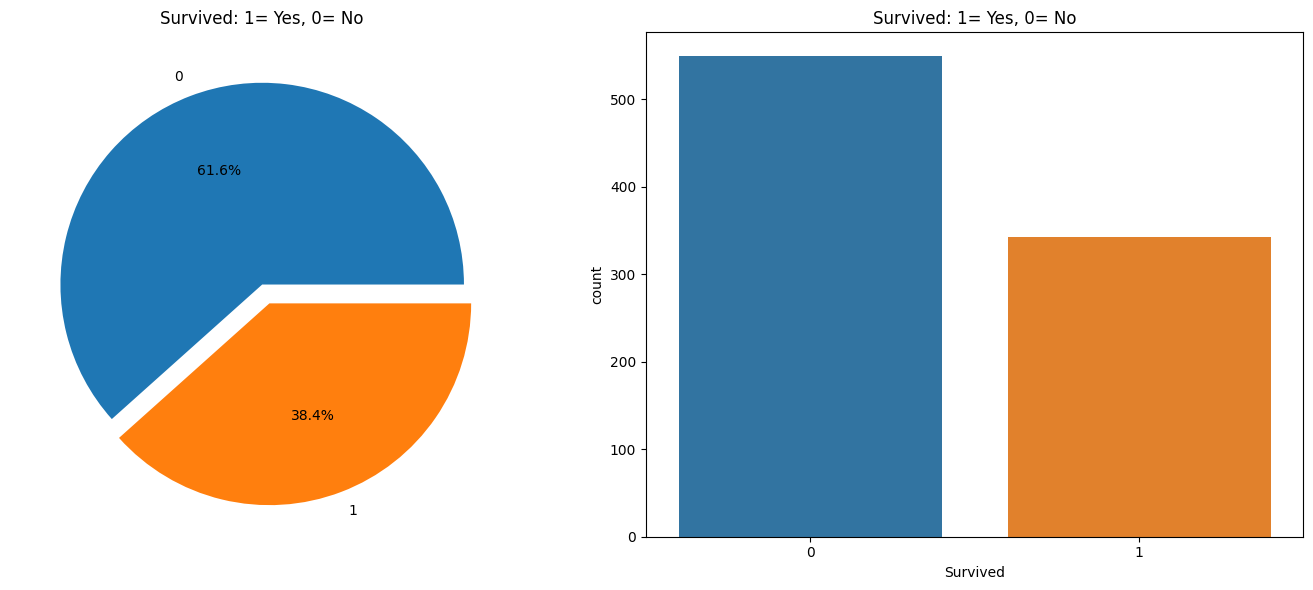

In [422]:
fig,axs = plt.subplots(1,2, figsize = (14,6))

train["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', ax=axs[0], shadow=False)
axs[0].set_title("Survived: 1= Yes, 0= No")
axs[0].set_ylabel("")
    #-----#
axs[1] = sns.countplot(x="Survived",data=train)
axs[1].set_title("Survived: 1= Yes, 0= No")
#plt.subplots_adjust(wspace=-0.01)
plt.tight_layout()
plt.show()


We can clearly see that more than the half of passengers did not survive with percentage of only ***38.4%*** for the ones who survived and ***61.6%*** for the ones who didn't 

## Sex of passengers :

<Axes: ylabel='count'>

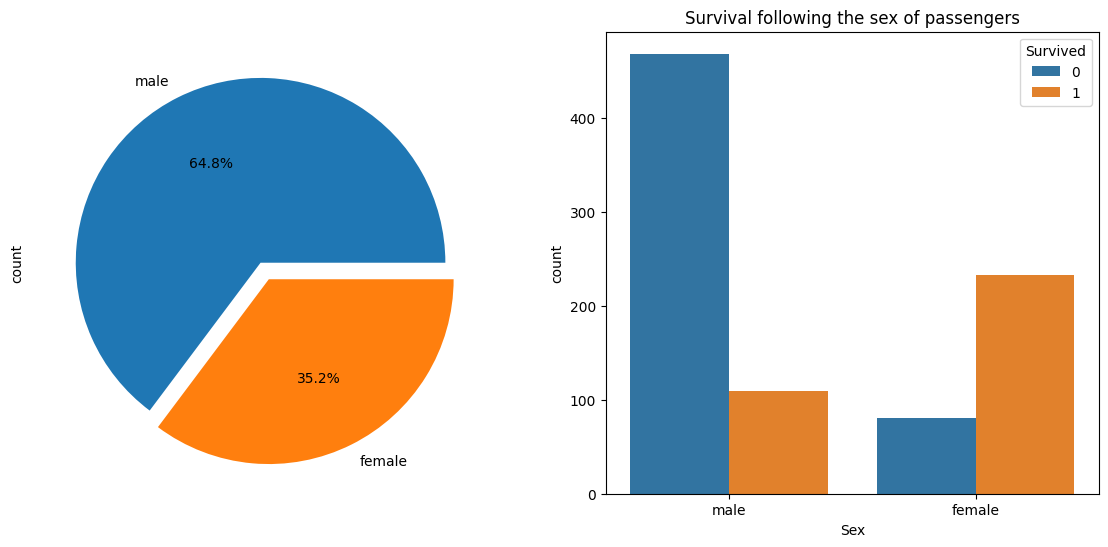

In [423]:
fig,ax= plt.subplots(1,2,figsize=(14,6))
ax[1]= sns.countplot(x="Sex", data=train, hue="Survived")
ax[1].set_title("Survival following the sex of passengers")
#----#
train["Sex"].value_counts().plot.pie(explode= [0,0.1], autopct="%1.1f%%", ax=ax[0])

We can see from the pieplot that more then the half of passnegers are men representing **64%.8** of passengers and **35.2%** for women.\
However more than the half of women survived and the majjority of men passengers didn't.\ 
We can see a clear influence of the sex of a passenger and it's chances of survivng

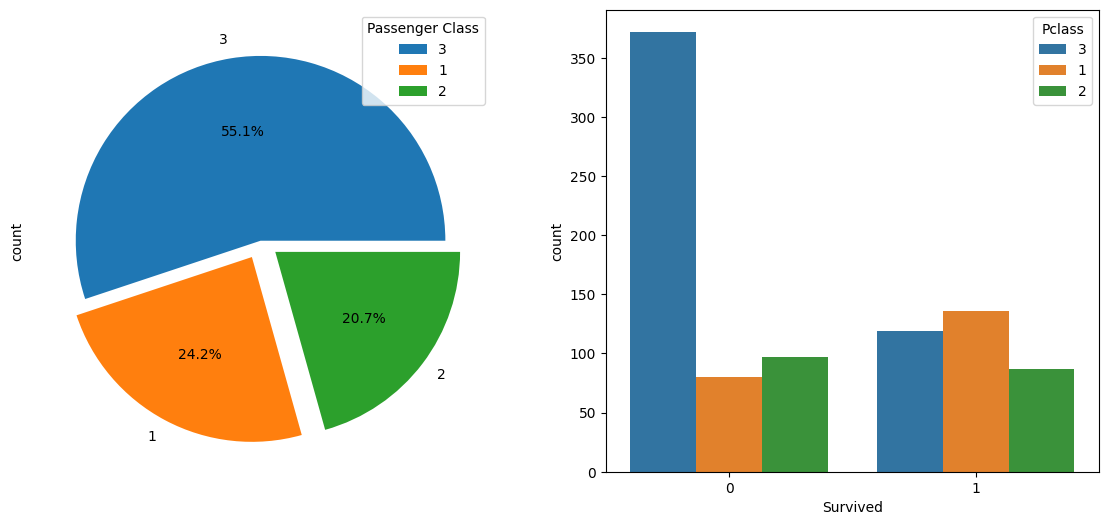

In [424]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
labels=train['Pclass'].unique()
hue_order=train['Pclass'].unique()

train["Pclass"].value_counts().plot.pie(explode= [0,0.1,0.1], autopct = "%1.1f%%",ax=ax[0], shadow=False, labels=train['Pclass'].unique())
ax[0].legend(labels, title="Passenger Class", loc='best')
#----#
ax[1]=sns.countplot(x="Survived", data=train, hue='Pclass',hue_order=hue_order)


We can se that the majority of passengers are part of the ***Third Class*** and they represent the majority of the passangers that didn't survive

# Feature Engineering :

## Handeling missing Data

### Cabin:

Since 77% of the **Cabin** data is missing we will drop this column 

In [425]:
train.drop("Cabin", axis=1,inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [426]:
percent_missing(train)

Age         19.865320
Embarked     0.224467
dtype: float64


### Embarked

Only **0.2** of data is missing for the **Embarked** Column and since it's a categorical feature so we could replalce missing values with the **mode** 

In [427]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])

In [428]:
percent_missing(train)

Age    19.86532
dtype: float64


### Age 

- To handle the missing values of age we could impute the values using these columns for the imputation. We opt for a KNN Imputation.

- We will first encode the "Sex": ***1:male, 0:female*** to include in the imputaion process to have more accurate results for the Age column.



In [429]:
train["Sex"]= train["Sex"].map({"male":1,"female":0})
test["Sex"]= test["Sex"].map({"male":1,"female":0})



In [430]:
train.select_dtypes(include="number").corr()["Age"].sort_values(ascending=True)

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Survived      -0.077221
PassengerId    0.036847
Sex            0.093254
Fare           0.096067
Age            1.000000
Name: Age, dtype: float64

In [431]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

imputed_cols = ['Pclass','SibSp','Parch','Survived','Sex','Fare','Age']
scaler = StandardScaler()
X= train[imputed_cols]
X_test = train[imputed_cols]

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

imputer = KNNImputer(n_neighbors= 5)

imputed_scaled = imputer.fit_transform(X_scaled)
imputed_test_scaled = imputer.transform(X_test_scaled)

imputed_original_scale = scaler.inverse_transform(imputed_scaled)
imputed_test_original_scale = scaler.inverse_transform(imputed_test_scaled)

imputed_scaled_df = pd.DataFrame(imputed_original_scale, columns= imputed_cols)
imputed_test_scaled_df = pd.DataFrame(imputed_test_original_scale, columns = imputed_cols)

train["Age"] = imputed_scaled_df["Age"]
test["Age"] = imputed_test_scaled_df["Age"]

In [432]:
percent_missing(train)
percent_missing(test)

Series([], dtype: float64)
Fare    0.239234
dtype: float64


### Fare (test dataset)

In [433]:
test[test['Fare'].isna() == True]["Pclass"]

152    3
Name: Pclass, dtype: int64

There is only one fare value missing so we will replace it with the mean fare of that Class

In [434]:
test["Fare"] = test["Fare"].interpolate(method='linear')

In [435]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                             1
Age                          55.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                     10.03955
Embarked                        S
Name: 152, dtype: object

In [436]:
percent_missing(test)

Series([], dtype: float64)


The **Ticket** feature dosen't yield useful information, unless we do some exhaustive preprocessing to the **Ticket** column so we will drop it for now.

In [437]:
train.drop("Ticket", axis=1, inplace= True)
test.drop("Ticket", axis=1, inplace= True)

## Optimizing Features
Great! Now that we handeled the missing values we could start optimizing our Features: 
- Creating a new feature **Family Size** which is the sum of *SbSp* and *Parch*
- Creating a new feature **Title** that we are going to extract from the name of the passengers and ecode it 
- Encode the **Embarked** feature 

In [438]:
train["Family Size"] = train["SibSp"] + train["Parch"] + 1
test["Family Size"] = test["SibSp"] + test["Parch"] + 1

In [439]:
train["Family Size"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family Size, Length: 891, dtype: int64

### Title :

In [440]:


train['Title'] = train["Name"].str.extract("([A-Za-z]+)\.", expand= False)
test['Title'] = test["Name"].str.extract("([A-Za-z]+)\.", expand = False)
print("Training Data Set \n")
print(train['Title'].unique())
print("\n Testing Data Set \n")
print(test['Title'].unique())
train

Training Data Set 

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

 Testing Data Set 

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.2,1,2,23.4500,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,1,Mr


In [441]:
train.Title = train.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer','Dona'],"Rare")
test.Title = test.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer','Dona'],"Rare")

train.Title = train.Title.replace('Mme',"Mrs")
test.Title = test.Title.replace('Mme',"Mrs")

train.Title = train.Title.replace('Ms',"Miss")
test.Title = test.Title.replace('Ms',"Miss")

train.Title = train.Title.replace('Mlle',"Miss")
test.Title = test.Title.replace('Mlle',"Miss")

train.Title = train.Title.replace(['Lady', 'Sir','Countess'],"Royal")
test.Title = test.Title.replace(['Lady', 'Sir','Countess'],"Royal")

Title_Map = {"Mr":1,"Mrs":2,"Miss":3,
            "Master":4,"Royal":5,"Rare":6}

train.Title = train.Title.map(Title_Map)
test.Title = test.Title.map(Title_Map)


print("Training Data Set \n")
print(train['Title'].unique())
print("\n Testing Data Set \n")
print(test['Title'].unique())

Training Data Set 

[1 2 3 4 6 5]

 Testing Data Set 

[1 2 3 4 6]


Now we don't need the Name feature so we could drop it

In [442]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis= 1, inplace=True)

In [443]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Family Size  891 non-null    int64  
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB


### Embarked: 

In [444]:
Embarked_Map = {"S":1,"Q":2,"C":3}
train["Embarked"] = train['Embarked'].map(Embarked_Map)
test["Embarked"] = test['Embarked'].map(Embarked_Map)

train["Embarked"]

0      1
1      3
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    3
890    2
Name: Embarked, Length: 891, dtype: int64

In [445]:
train.drop("PassengerId",axis=1,inplace=True)

# Training the Model:

In [446]:

from sklearn.model_selection import train_test_split
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Title
0,0,3,1,22.0,1,0,7.2500,1,2,1
1,1,1,0,38.0,1,0,71.2833,3,2,2
2,1,3,0,26.0,0,0,7.9250,1,1,3
3,1,1,0,35.0,1,0,53.1000,1,2,2
4,0,3,1,35.0,0,0,8.0500,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1,6
887,1,1,0,19.0,0,0,30.0000,1,1,3
888,0,3,0,22.2,1,2,23.4500,1,4,3
889,1,1,1,26.0,0,0,30.0000,3,1,1


In [447]:

X = train.drop(['Survived'], axis=1)
y= train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [448]:
from sklearn.ensemble import RandomForestClassifier

In [449]:
randomForest = RandomForestClassifier()

In [450]:
randomForest.fit(X_train,y_train)

RandomForestClassifier()

In [451]:
y_pred = randomForest.predict(X_test)

In [452]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [453]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       157
           1       0.79      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



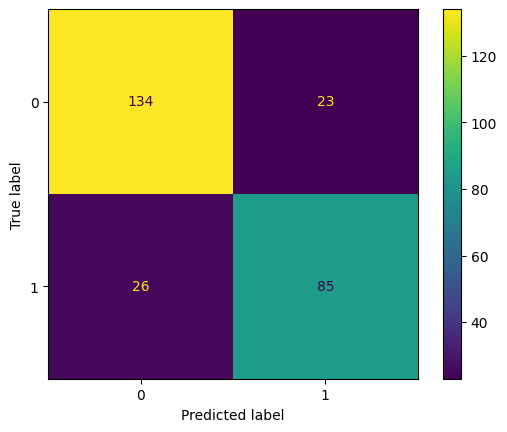

In [454]:
ConfusionMatrixDisplay.from_estimator(randomForest,X_test,y_test);

Having 24 False Negatives indicates that a significant number of positive cases are being misclassified, which could have serious consequences. To address this, we need to adjust the model to reduce False Negatives. One way to achieve this is by analyzing the ROC curve to find a better threshold for classification.

Text(0.5, 1.0, 'ROC Curve (AUC =  0.81)')

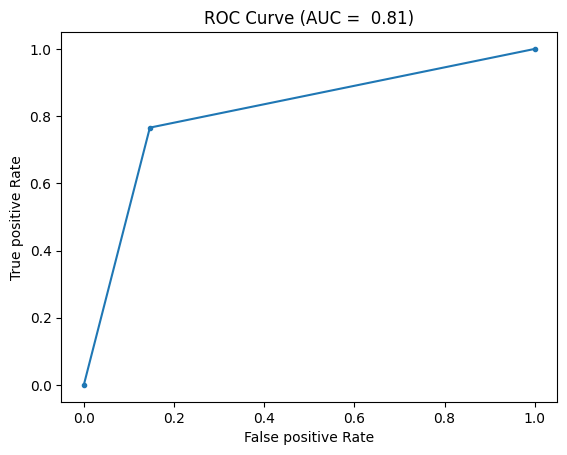

In [455]:
from sklearn.metrics import roc_curve, roc_auc_score

frp,tpr, thresholds = roc_curve(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)

plt.figure()
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score: .2f})')


## Final File :

In [456]:
test_index = test.PassengerId
test.drop('PassengerId',axis=1,inplace=True)
test_pred = randomForest.predict(test)
my_submission = pd.DataFrame({'PassengerId': test_index, 'Survived': test_pred})
my_submission.to_csv('submission.csv', index=False)

In [457]:
my_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
